First download the data (Train.zip, Test.zip) from [this link](https://data.mendeley.com/datasets/468j46mzdv/1), then unzip and locate in data/N_MNIST folder, accordingly to your path in globals.py

In [1]:
import numpy as np
import torch
from utils.globals import PATH_TO_N_MNIST

In [2]:
def load_n_mnist_events(filename):

    with open(filename, 'rb') as f:
        evt_stream = np.frombuffer(f.read(), dtype=np.uint8)

    # Ensure the data length is a multiple of 5 bytes
    num_events = evt_stream.size // 5
    evt_stream = evt_stream[:num_events * 5]

    # Extract event data
    TD_x = evt_stream[0::5].astype(np.int16) + 1        # X addresses, starting from 1
    TD_y = evt_stream[1::5].astype(np.int16) + 1        # Y addresses, starting from 1

    # Extract polarity from the most significant bit of the 3rd byte
    TD_p = ((evt_stream[2::5] >> 7) & 0x01)             # Polarity: 0 (OFF), 1 (ON)

    # Extract timestamp bits
    TD_ts = ((evt_stream[2::5] & 0x7F).astype(np.uint32) << 16)  # Bits 6-0 of 3rd byte
    TD_ts |= (evt_stream[3::5].astype(np.uint32) << 8)           # 4th byte
    TD_ts |= evt_stream[4::5].astype(np.uint32)                  # 5th byte

    return TD_x, TD_y, TD_ts, TD_p

In [24]:
# Path to a sample .bin file
file_path = PATH_TO_N_MNIST + '\\Train\\3\\00008.bin'

TD_x, TD_y, TD_ts, TD_p = load_n_mnist_events(file_path)

In [25]:
# Display the first 5 events
for i in range(1000):
    print(f"Event {i+1}: Timestamp={TD_ts[i]}, X={TD_x[i]}, Y={TD_y[i]}, Polarity={TD_p[i]}")

Event 1: Timestamp=1138, X=17, Y=10, Polarity=0
Event 2: Timestamp=2428, X=12, Y=17, Polarity=0
Event 3: Timestamp=2953, X=18, Y=7, Polarity=1
Event 4: Timestamp=3042, X=9, Y=26, Polarity=0
Event 5: Timestamp=3824, X=12, Y=18, Polarity=0
Event 6: Timestamp=4119, X=15, Y=25, Polarity=0
Event 7: Timestamp=4716, X=12, Y=26, Polarity=0
Event 8: Timestamp=5197, X=18, Y=10, Polarity=0
Event 9: Timestamp=5213, X=19, Y=10, Polarity=0
Event 10: Timestamp=6162, X=14, Y=17, Polarity=0
Event 11: Timestamp=6193, X=12, Y=11, Polarity=0
Event 12: Timestamp=6338, X=10, Y=27, Polarity=0
Event 13: Timestamp=6947, X=11, Y=10, Polarity=0
Event 14: Timestamp=6954, X=12, Y=10, Polarity=0
Event 15: Timestamp=6974, X=15, Y=8, Polarity=1
Event 16: Timestamp=7021, X=16, Y=7, Polarity=1
Event 17: Timestamp=7891, X=15, Y=26, Polarity=0
Event 18: Timestamp=8569, X=17, Y=7, Polarity=1
Event 19: Timestamp=8703, X=14, Y=26, Polarity=0
Event 20: Timestamp=8812, X=16, Y=25, Polarity=0
Event 21: Timestamp=9163, X=9, Y=2

In [26]:
events = {
    'x': TD_x,
    'y': TD_y,
    'polarity': TD_p,
    'timestamp': TD_ts
}

# If you prefer a structured array
dtype = [('x', np.int16), ('y', np.int16), ('polarity', np.int8), ('timestamp', np.uint32)]
structured_events = np.core.records.fromarrays([TD_x, TD_y, TD_p, TD_ts], dtype=dtype)

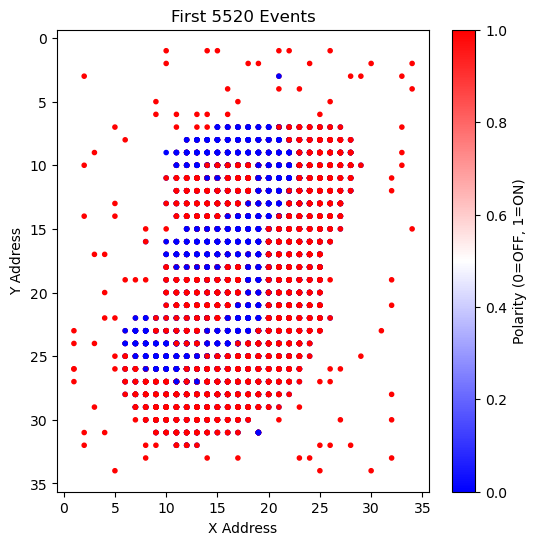

In [27]:
import matplotlib.pyplot as plt

# Plot the first 1000 events
num_plot_events = len(list(events.values())[0])
plt.figure(figsize=(6, 6))
plt.scatter(TD_x[:num_plot_events], TD_y[:num_plot_events], c=TD_p[:num_plot_events], cmap='bwr', marker='.')
plt.gca().invert_yaxis()
plt.xlabel('X Address')
plt.ylabel('Y Address')
plt.title(f'First {num_plot_events} Events')
plt.colorbar(label='Polarity (0=OFF, 1=ON)')
plt.show()